<h1><center>News Classification</center></h1>

<h2>Load and Explore the Data</h2>

In [1]:
import pandas as pd

In [2]:
df =pd.read_csv('hyspress_dataset.csv',encoding ='utf-8')

In [3]:
df.head()

,category,text
0,sport,أوعنا بلعيد ارتقى فريق المغرب الرياضي الفاسي ...
1,sport,هسبريس - أ.ف.ب أتم ليفربول عاما كاملا من دون ...
2,sport,أوعنا بلعيد تحدث الدنماركي لاسه شونه، لاعب جن...
3,sport,أوعنا بلعيد يشعر المغربي كريم الأحمدي، لاعب ن...
4,sport,"صالح الخزاعي من خريبكة بعدما انتظر ممارسو ""ري..."


In [4]:
df = df.rename(columns={'\u200etext': 'text'})

In [5]:
df["text"]

0       أوعنا بلعيد  ارتقى فريق المغرب الرياضي الفاسي ...
1       هسبريس - أ.ف.ب  أتم ليفربول عاما كاملا من دون ...
2       أوعنا بلعيد  تحدث الدنماركي لاسه شونه، لاعب جن...
3       أوعنا بلعيد  يشعر المغربي كريم الأحمدي، لاعب ن...
4       صالح الخزاعي من خريبكة  بعدما انتظر ممارسو "ري...
                              ...                        
3915    هسبريس من الرباط  صدر لحسن الوزاني، كاتب مغربي...
3916    هسبريس من الرباط  انتخبت الجمعية العمومية لمرك...
3917    هسبريس - وائل بورشاشن (صور: منير امحيمدات)  طو...
3918    هسبريس - وائل بورشاشن  انطلَق "مهرجان السينما ...
3919    هسبريس - مصطفى شاكري (صور: محمد اكريمي)  انطلق...
Name: text, Length: 3920, dtype: object

In [6]:
df['category_id'] = df['category'].factorize()[0]
df['category_id'][0:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: category_id, dtype: int64

In [7]:
category_id_df = df[['category', 'category_id']].drop_duplicates().sort_values('category_id')

In [8]:
category_id_df

,category,category_id
0,sport,0
980,politique,1
1960,economie,2
2940,art-et-culture,3


In [9]:
# Create a dictionary that can easily convert category names into category_ids and vice-versa
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

In [10]:
category_to_id


{'sport': 0, 'politique': 1, 'economie': 2, 'art-et-culture': 3}

In [11]:
df.sample(10, random_state=0)

,category,text,category_id
538,sport,أوعنا بلعيد تعتزم الكونفدرالية الإفريقية لكرة...,0
3000,art-et-culture,هسبريس من الرباط وفق توزيع موسيقي جديد، قرر ا...,3
825,sport,أوعنا بلعيد استقرت الجامعة الملكية المغربية ل...,0
924,sport,أوعنا بلعيد يقترب مسؤولو فريق ديجون الفرنسي ل...,0
3093,art-et-culture,هسبريس من الرباط أصدر الباحث أبوبكر أولياس مؤ...,3
3275,art-et-culture,جو جاكسون من لندن* تعتبر المخبرة البريطانية ك...,3
3671,art-et-culture,هسبريس - د.ب.أ توفي المخرج الإيطالي المشهور و...,3
3647,art-et-culture,هسبريس - وائل بورشاشن صدَحَت قباقبُ وآلاتٌ وت...,3
1059,politique,هسبريس- عبد السلام الشامخ (صور: منير امحميدات)...,1
3227,art-et-culture,"هسبريس - إفي أصبح ""جوكر"" الفيلم الأعلى تحقيقا...",3


In [12]:
df.groupby('category').category_id.count()

category
art-et-culture    980
economie          980
politique         980
sport             980
Name: category_id, dtype: int64

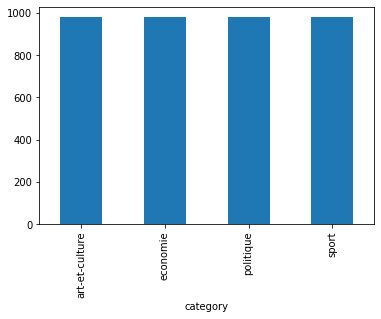

In [13]:
df.groupby('category').category_id.count().plot.bar(ylim=0)

<h2>Convert words in the news articles into numerical features using tfdif</h2>

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

spw=["،","ء","ءَ","آ","آب","آذار","آض","آل","آمينَ","آناء","آنفا","آه","آهاً","آهٍ","آهِ","أ","أبدا","أبريل","أبو","أبٌ","أجل","أجمع","أحد","أخبر","أخذ","أخو","أخٌ","أربع","أربعاء","أربعة","أربعمئة","أربعمائة","أرى","أسكن","أصبح","أصلا","أضحى","أطعم","أعطى","أعلم","أغسطس","أفريل","أفعل به","أفٍّ","أقبل","أكتوبر","أل","ألا","ألف","ألفى","أم","أما","أمام","أمامك","أمامكَ","أمد","أمس","أمسى","أمّا","أن","أنا","أنبأ","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنه","أنًّ","أنّى","أهلا","أو","أوت","أوشك","أول","أولئك","أولاء","أولالك","أوّهْ","أى","أي","أيا","أيار","أيضا","أيلول","أين","أيّ","أيّان","أُفٍّ","ؤ","إحدى","إذ","إذا","إذاً","إذما","إذن","إزاء","إلى","إلي","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنَّ","إى","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","ئ","ا","ا?","ا?ى","االا","االتى","ابتدأ","ابين","اتخذ","اثر","اثنا","اثنان","اثني","اثنين","اجل","احد","اخرى","اخلولق","اذا","اربعة","اربعون","اربعين","ارتدّ","استحال","اصبح","اضحى","اطار","اعادة","اعلنت","اف","اكثر","اكد","الآن","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الحالي","الذاتي","الذى","الذي","الذين","السابق","الف","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","الي","اليه","اليها","اليوم","اما","امام","امس","امسى","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بؤسا","بإن","بئس","باء","بات","باسم","بان","بخٍ","بد","بدلا","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعدا","بعض","بغتة","بل","بلى","بن","به","بها","بهذا","بيد","بين","بَسْ","بَلْهَ","ة","ت","تاء","تارة","تاسع","تانِ","تانِك","تبدّل","تجاه","تحت","تحوّل","تخذ","ترك","تسع","تسعة","تسعمئة","تسعمائة","تسعون","تسعين","تشرين","تعسا","تعلَّم","تفعلان","تفعلون","تفعلين","تكون","تلقاء","تلك","تم","تموز","تينك","تَيْنِ","تِه","تِي","ث","ثاء","ثالث","ثامن","ثان","ثاني","ثلاث","ثلاثاء","ثلاثة","ثلاثمئة","ثلاثمائة","ثلاثون","ثلاثين","ثم","ثمان","ثمانمئة","ثمانون","ثماني","ثمانية","ثمانين","ثمنمئة","ثمَّ","ثمّ","ثمّة","ج","جانفي","جدا","جعل","جلل","جمعة","جميع","جنيه","جوان","جويلية","جير","جيم","ح","حاء","حادي","حار","حاشا","حاليا","حاي","حبذا","حبيب","حتى","حجا","حدَث","حرى","حزيران","حسب","حقا","حمدا","حمو","حمٌ","حوالى","حول","حيث","حيثما","حين","حيَّ","حَذارِ","خ","خاء","خاصة","خال","خامس","خبَّر","خلا","خلافا","خلال","خلف","خمس","خمسة","خمسمئة","خمسمائة","خمسون","خمسين","خميس","د","دال","درهم","درى","دواليك","دولار","دون","دونك","ديسمبر","دينار","ذ","ذا","ذات","ذاك","ذال","ذانك","ذانِ","ذلك","ذهب","ذو","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","ر","رأى","راء","رابع","راح","رجع","رزق","رويدك","ريال","ريث","رُبَّ","ز","زاي","زعم","زود","زيارة","س","ساء","سابع","سادس","سبت","سبتمبر","سبحان","سبع","سبعة","سبعمئة","سبعمائة","سبعون","سبعين","ست","ستة","ستكون","ستمئة","ستمائة","ستون","ستين","سحقا","سرا","سرعان","سقى","سمعا","سنة","سنتيم","سنوات","سوف","سوى","سين","ش","شباط","شبه","شتانَ","شخصا","شرع","شمال","شيكل","شين","شَتَّانَ","ص","صاد","صار","صباح","صبر","صبرا","صدقا","صراحة","صفر","صهٍ","صهْ","ض","ضاد","ضحوة","ضد","ضمن","ط","طاء","طاق","طالما","طرا","طفق","طَق","ظ","ظاء","ظل","ظلّ","ظنَّ","ع","عاد","عاشر","عام","عاما","عامة","عجبا","عدا","عدة","عدد","عدم","عدَّ","عسى","عشر","عشرة","عشرون","عشرين","عل","علق","علم","على","علي","عليك","عليه","عليها","علًّ","عن","عند","عندما","عنه","عنها","عوض","عيانا","عين","عَدَسْ","غ","غادر","غالبا","غدا","غداة","غير","غين","ـ","ف","فإن","فاء","فان","فانه","فبراير","فرادى","فضلا","فقد","فقط","فكان","فلان","فلس","فهو","فو","فوق","فى","في","فيفري","فيه","فيها","ق","قاطبة","قاف","قال","قام","قبل","قد","قرش","قطّ","قلما","قوة","ك","كأن","كأنّ","كأيّ","كأيّن","كاد","كاف","كان","كانت","كانون","كثيرا","كذا","كذلك","كرب","كسا","كل","كلتا","كلم","كلَّا","كلّما","كم","كما","كن","كى","كيت","كيف","كيفما","كِخ","ل","لأن","لا","لا سيما","لات","لازال","لاسيما","لام","لايزال","لبيك","لدن","لدى","لدي","لذلك","لعل","لعلَّ","لعمر","لقاء","لكن","لكنه","لكنَّ","للامم","لم","لما","لمّا","لن","له","لها","لهذا","لهم","لو","لوكالة","لولا","لوما","ليت","ليرة","ليس","ليسب","م","مئة","مئتان","ما","ما أفعله","ما انفك","ما برح","مائة","ماانفك","مابرح","مادام","ماذا","مارس","مازال","مافتئ","ماي","مايزال","مايو","متى","مثل","مذ","مرّة","مساء","مع","معاذ","معه","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليم","مليون","مما","من","منذ","منه","منها","مه","مهما","ميم","ن","نا","نبَّا","نحن","نحو","نعم","نفس","نفسه","نهاية","نوفمبر","نون","نيسان","نيف","نَخْ","نَّ","ه","هؤلاء","ها","هاء","هاكَ","هبّ","هذا","هذه","هل","هللة","هلم","هلّا","هم","هما","همزة","هن","هنا","هناك","هنالك","هو","هي","هيا","هيهات","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهات","و","و6","وأبو","وأن","وا","واحد","واضاف","واضافت","واكد","والتي","والذي","وان","واهاً","واو","واوضح","وبين","وثي","وجد","وراءَك","ورد","وعلى","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولايزال","ولكن","ولم","وله","وليس","ومع","ومن","وهب","وهذا","وهو","وهي","وَيْ","وُشْكَانَ","ى","ي","ياء","يفعلان","يفعلون","يكون","يلي","يمكن","يمين","ين","يناير","يوان","يورو","يوليو","يوم","يونيو","أيّان"]
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),analyzer = 'word', stop_words=spw)


features = tfidf.fit_transform(df.text).toarray()
labels = df.category_id  

/home/abdessamad/PycharmProjects/ai-text-classification/venv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [15]:
features.shape

(3920, 36916)

In [16]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2
import numpy as np

N = 3  # We are going to look for top 3 categories

for category, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)                   # Do chi2 analyses of all items in this category
    indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
    feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
    print("# '{}':".format(category))
    print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
    print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat

# 'art-et-culture':
  . Most correlated unigrams:
       . الفنية
       . الفيلم
       . الفنان
  . Most correlated bigrams:
       . الفنان المغربي
       . وزارة الثقافة
       . الثقافة والاتصال
# 'economie':
  . Most correlated unigrams:
       . بنسبة
       . الشركات
       . المائة
  . Most correlated bigrams:
       . يوسف لخضر
       . هسبريس يوسف
       . محمد لديب
# 'politique':
  . Most correlated unigrams:
       . لحزب
       . الحزب
       . حزب
  . Most correlated bigrams:
       . رئيس الحكومة
       . العدالة والتنمية
       . الأمين العام
# 'sport':
  . Most correlated unigrams:
       . اللاعب
       . لكرة
       . القدم
  . Most correlated bigrams:
       . الدولي المغربي
       . أوعنا بلعيد
       . لكرة القدم


In [17]:
features_chi2

(array([0.01520992, 0.59719628, 0.00494834, ..., 2.96280931, 2.84372527,
        3.73302023]),
 array([0.90184696, 0.43964978, 0.9439195 , ..., 0.08519979, 0.09173132,
        0.05334685]))

<h2>Use t-SNE : A Dimensionality reduction technique to visualize ( in 2 diemnsions), a high dimensional space</h2>

In [18]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 

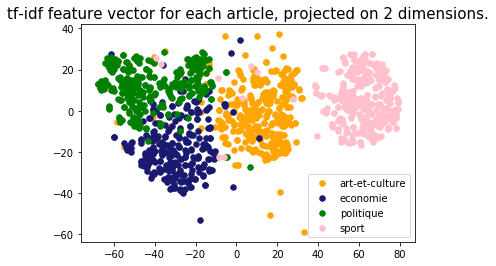

In [19]:
from matplotlib import pyplot as plt
colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey']

# Find points belonging to each category and plot them
for category, category_id in sorted(category_to_id.items()):
    points = projected_features[(labels[indices] == category_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[category_id], label=category)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

<h2>Model Training and Evaluation</h2>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [21]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [22]:
#For each Algorithm 
for model in models:
    model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))

/home/abdessamad/PycharmProjects/ai-text-classification/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abdessamad/PycharmProjects/ai-text-classification/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/abdessamad/PycharmProjects/ai-text-classification/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/abdessamad/PycharmProjects/ai-text-classification/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

In [23]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

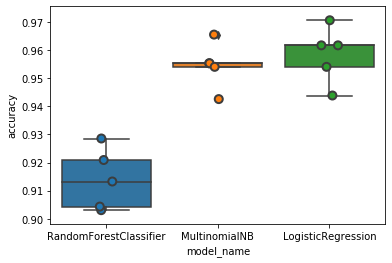

In [24]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [25]:
# Mean accuracy of each algorithm
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.958418
MultinomialNB             0.954592
RandomForestClassifier    0.914031
Name: accuracy, dtype: float64

In [26]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.928571
1,RandomForestClassifier,1,0.920918
2,RandomForestClassifier,2,0.903061
3,RandomForestClassifier,3,0.904337
4,RandomForestClassifier,4,0.913265
5,MultinomialNB,0,0.965561
6,MultinomialNB,1,0.955357
7,MultinomialNB,2,0.942602
8,MultinomialNB,3,0.955357
9,MultinomialNB,4,0.954082


In [33]:
from sklearn.model_selection import train_test_split

model = MultinomialNB()

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

Text(0.5, 15.0, 'Predicted')

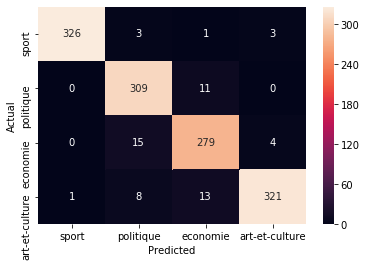

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.category.values, yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [36]:
texts = ["ضع ساعات فقط مرت على اغتيال اللواء قاسم سليماني قائد فيلق القدس التابع للحرس الثوري الإيراني فجر اليوم الجمعة في العراق، ليعلن المرشد الأعلى للثورة الإيرانية علي خامنئي تعيين العميد إسماعيل قآني خلفا له.  وفي بيان نُشر على موقعه الرسمي على الإنترنت، قال خامنئي أحيل منصب قيادة قوة القدس في حرس الثورة الإسلامية إلى القائد العميد إسماعيل قآني، ووصف البيان القائد الجديد بأنه كان من أبرز قادة الحرس الثوري خلال الحرب العراقية الإيرانية في ثمانينيات القرن الماضي.  شغل قآني منصب نائب قائد فيلق القدس، لنحو عقدين من الزمان، بعدما تدرج في عدة مناصب داخل الحرس الثوري، أبرزها قيادة العمليات في أفغانستان وباكستان.  وينظر إلى إسماعيل قآني على أنه ظِل سليماني الأكثر تشددا، حيث سلطت الأضواء دائما على سليماني الذي كان حاضرا بقوة في ملفات وأزمات عدة في المنطقة، أبرزها سوريا، والعراق التي قُتل بها فجر اليوم عقب وصوله بلحظات.  يُعرف عن قآني -المولود في مشهد (مركز محافظة خراسان) عام 1958- تأييده للتدخل الإيراني في دول المنطقة، ولا سيما العراق، وسوريا التي اعتبر أن الحرب فيها وجودية ومصيرية، فضلا عن أنه شارك فيها بصفة مستشار عسكري.  وتصفه وسائل إعلام إيرانية بأنه الرجل الصلب الذي لا يختلف كثيرا عن سليماني، وله الخبرة الكافية في التعامل مع جبهات القتال المختلفة، كما يُعرف عنه بأنه من المنظرين لمفهوم التشكيلات الشعبية.",
         "يطارد النجم البرتغالي كريستيانو رونالدو أحلاما يسعى لتحقيقها في عام 2020، ليعوض بعض الإخفاقات التي تعرض لها العام الماضي، وأبرزها خسارته كل الألقاب الفردية على مستوى الاتحاد الدولي لكرة القدم (فيفا) والاتحاد الأوروبي للعبة (يويفا).  وأهم أحلام رونالدو قيادة يوفنتوس للتتويج بلقب دوري أبطال أوروبا الذي أخرجه منه الموسم الماضي فريق أياكس أمستردام الهولندي، كما سيعمل على استمرار احتكار فريقه للدوري الإيطالي في ظل المنافسة الشديدة من إنتر ميلان له هذا الموسم.  ويحلم رونالدو (34 عاما) أيضا بقيادة منتخب بلاده للفوز بلقب كأس الأمم الأوروبية للمرة الثانية على التوالي، خاصة وأن مشاركته قد تكون الأخيرة له في البطولة.  ويسعى الدون أيضا للتسجيل قدر الإمكان في البطولة ليصبح الهداف التاريخي للمنطقة اليورو منفردا، حيث يتشارك حاليا مع النجم الفرنسي السابق ميشيل بلاتيني لقب هداف البطولة بـ9 أهداف لكل منهما.  وإذا نجح رونالدو في تحقيق البطولتين فسيحسم كل الألقاب الفردية هذا العام وأبرزها الكرة الذهبية، التي فاز بها 5 مرات وتفوق عليه ميسي برصيد 6 مرات بعد تتويجه بها العام الماضي، وحتى إن فاز ببطولة واحدة منهما فسيكون اسمه مدرجا بشكل أكثر قوة من عام 2019.  كما يحلم رونالدو بأن يقبض قبل اعتزاله على لقب أفضل هداف بالمباريات الدولية في التاريخ والذي يتربع عليه حاليا المهاجم الإيراني علي دائي برصيد 109 أهداف سجلها مع منتخب بلاده، على بعد 10 أهداف فقط من النجم البرتغالي المخضرم.",
         "أربك مقتل قائد فيلق القدس الإيراني قاسم سليماني بضربة جوية أميركية اليوم في بغداد أسواق المال والنفط العالمية، فما الذي حدث؟  أسواق النفط قفزت أسعار النفط العالمية لتقترب من سبعين دولارا للبرميل في تعاملات اليوم الجمعة في أعقاب الغارة التي نفذتها القوات الأميركية واستهدفت قاسم سليماني قرب مطار بغداد.  وارتفع سعر التعاقدات الآجلة لخام برنت، وهو الخام القياسي للنفط في الأسواق العالمية، بأكثر من 4% خلال تعاملات اليوم، ليقفز إلى أعلى مستوى في أكثر من ثلاثة أشهر، في ظل المخاوف من تداعيات مقتل سليماني على استقرار إمدادات النفط في منطقة الخليج بشكل خاص.  وارتفع سعر خام برنت اليوم بنحو 2.91 دولار أي بنسبة 4.4% إلى 69.16 دولارا قبل أن يتراجع قليلا.  وكانت آخر مرة كسرت فيها عقود برنت حاجز 69 دولارا، منتصف سبتمبر/أيلول الماضي، تزامنا مع هجمات على منشأتين نفطيتين تتبعان أرامكو في السعودية.  كما ارتفع سعر خام غرب تكساس الوسيط، وهو الخام القياسي للنفط الأميركي، بنسبة 3.9% إلى 63.57 دولارا للبرميل، تسليم فبراير/شباط المقبل، بعد أن ارتفع بنسبة 4.4% في بداية تعاملات اليوم ليصل إلى أعلى مستوى له منذ مايو/أيار الماضي."
        
        
        ]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"ضع ساعات فقط مرت على اغتيال اللواء قاسم سليماني قائد فيلق القدس التابع للحرس الثوري الإيراني فجر اليوم الجمعة في العراق، ليعلن المرشد الأعلى للثورة الإيرانية علي خامنئي تعيين العميد إسماعيل قآني خلفا له.  وفي بيان نُشر على موقعه الرسمي على الإنترنت، قال خامنئي أحيل منصب قيادة قوة القدس في حرس الثورة الإسلامية إلى القائد العميد إسماعيل قآني، ووصف البيان القائد الجديد بأنه كان من أبرز قادة الحرس الثوري خلال الحرب العراقية الإيرانية في ثمانينيات القرن الماضي.  شغل قآني منصب نائب قائد فيلق القدس، لنحو عقدين من الزمان، بعدما تدرج في عدة مناصب داخل الحرس الثوري، أبرزها قيادة العمليات في أفغانستان وباكستان.  وينظر إلى إسماعيل قآني على أنه ظِل سليماني الأكثر تشددا، حيث سلطت الأضواء دائما على سليماني الذي كان حاضرا بقوة في ملفات وأزمات عدة في المنطقة، أبرزها سوريا، والعراق التي قُتل بها فجر اليوم عقب وصوله بلحظات.  يُعرف عن قآني -المولود في مشهد (مركز محافظة خراسان) عام 1958- تأييده للتدخل الإيراني في دول المنطقة، ولا سيما العراق، وسوريا التي اعتبر أن الحرب فيها وجودية ومصيرية، فضلا عن أنه شار

<h2>Save the Model </h2>

In [30]:
import pickle
pkl_filename = "pickle_model_arabic.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)


In [31]:
pkl_filename2 = "pickle_tfidf_arabic.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tfidf, file)


<h2>load the model </h2>

In [49]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [51]:
texts = ["The DNA computer uses a process known as hybridisation, which occurs when two strands of DNA attach together to form double-stranded DNA.",
         "Captain Tsubasa scores a magnificent goal for the Japanese team.",
         "Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions.",
         "Beyoncé releases a new album, tops the charts in all of south-east Asia!",
         "You won't guess what the latest trend in data analysis is!",
         "Carlos Ghosn, the multi-millionaire former boss of Nissan, spent months preparing to stand trial on financial misconduct charges. At least, that was what the Japanese authorities were led to believe.He posted 1bn yen (£6.8m; $8.9m) in bail in April. He was monitored by a 24-hour camera installed outside his house. His use of technology was heavily restricted and he was banned from travelling abroad.",
        "Officials of the Italian football team Napoli are close to settling the contract with Moroccan international Sofiane Amrabet, who plays this season in the Hellas Verona shirt on loan from the Belgian club Bruges.Calcio Mercato, the Italian website, in addition to journalist Nicolo Chira, said that on Friday the third of January this year, Sofyan Amrabat is expected to formalize his transfer to the Italian team, with a sum of 15 million euros and a contract that extends to four football seasons.For her part, the Belgian daily, Heath Newblad, said that the average Lions Square will play with a Napoli shirt starting next summer, adding that the salary of Amrabat will rise to 1.8 million euros in the season, while he will wear the 12th shirt with his new club."]
text_features = tfidf.transform(texts)
predictions = pickle_model.predict(text_features)
for text, predicted in zip(texts, predictions):
    print('"{}"'.format(text))
    print("  - Predicted as: '{}'".format(id_to_category[predicted]))
    print("")

"The DNA computer uses a process known as hybridisation, which occurs when two strands of DNA attach together to form double-stranded DNA."
  - Predicted as: 'tech'

"Captain Tsubasa scores a magnificent goal for the Japanese team."
  - Predicted as: 'sport'

"Merryweather mercenaries are sent on another mission, as government oversight groups call for new sanctions."
  - Predicted as: 'politics'

"Beyoncé releases a new album, tops the charts in all of south-east Asia!"
  - Predicted as: 'entertainment'

"You won't guess what the latest trend in data analysis is!"
  - Predicted as: 'tech'

"Carlos Ghosn, the multi-millionaire former boss of Nissan, spent months preparing to stand trial on financial misconduct charges. At least, that was what the Japanese authorities were led to believe.He posted 1bn yen (£6.8m; $8.9m) in bail in April. He was monitored by a 24-hour camera installed outside his house. His use of technology was heavily restricted and he was banned from travelling abroad